# Animal Sleep

Some animals, such as elephants, sleep only 3-4 hours a night, while others, like bats, can sleep up to 20 hours.

Is there a relationship between sleep duration and body mass? Is a species' diet correlated with sleep time?

The file `animal-sleep.csv` provides data on the average sleep duration of 77 animal species, along with their average body mass in kilograms.

In [2]:
# FOR GOOGLE COLAB ONLY.
# Uncomment and run the code below. A dialog will appear to upload files.
# Upload 'animal-sleep.csv' and 'linear_model.py'.

# from google.colab import files
# uploaded = files.upload()

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from linear_model import LinearModel

df = pd.read_csv('animal-sleep.csv')
df.head()

,animal,diet,sleep,mass
0,african elephant,herbivore,3.3,6654.000
1,african giant pouched rat,omnivore,8.3,1.000
2,african striped mouse,herbivore,8.7,0.044
3,arctic fox,carnivore,12.5,3.380
4,arctic ground squirrel,omnivore,16.6,0.920


Text(0, 0.5, 'hours of sleep per day')

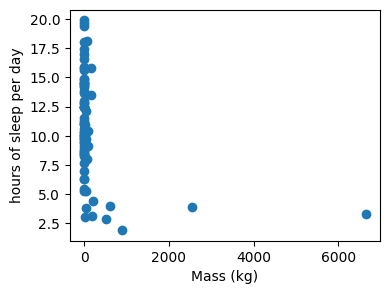

In [4]:
plt.figure(figsize=(4, 3))
plt.scatter(df['mass'], df['sleep'])
plt.xlabel('Mass (kg)')
plt.ylabel('hours of sleep per day')

We see that the mass data exhibits a strong right skew with a long tail. A log transformation can convert an exponential relationship into a linear one, making it easier to model with linear regression.

In [5]:
import math
df['log10_mass'] = df['mass'].apply(math.log10)  # apply the function to each element
df.head()

,animal,diet,sleep,mass,log10_mass
0,african elephant,herbivore,3.3,6654.000,3.823083
1,african giant pouched rat,omnivore,8.3,1.000,0.000000
2,african striped mouse,herbivore,8.7,0.044,-1.356547
3,arctic fox,carnivore,12.5,3.380,0.528917
4,arctic ground squirrel,omnivore,16.6,0.920,-0.036212


Below is code for plotting the data using the log scale.

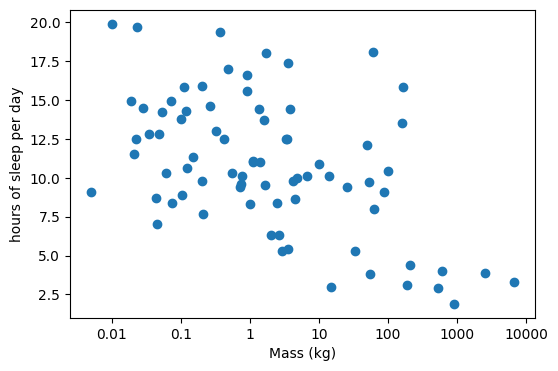

In [6]:
plt.figure(figsize=(6, 4))
plt.scatter(df['log10_mass'], df['sleep'])
plt.xlabel('Mass (kg)')
plt.ylabel('hours of sleep per day')
xticks = [-2, -1, 0, 1, 2, 3, 4]
xtick_labels = [0.01, 0.1, 1, 10, 100, 1000, 10000]
plt.xticks(xticks, xtick_labels)
plt.show()

### Project Ideas

- Model the relationship between `log10_mass` and hours of `sleep`.

- Create three separate linear models for each `diet` category: carnivores, omnivores, and herbivores.

- Visualize the data and their best-fit lines on a single plot with distinct colors and symbols for each `diet` category, or use separate plots if more suitable.

- Explore and propose mechanisms that could explain the results, potentially involving additional research.

In [7]:
# YOUR CODE HERE (add additional cells as needed)

# Linear model API

# linear = LinearModel()
# linear.fit(x, y)
# linear.predict(x)
# linear.plot_model(x_min, x_max, color="black")
# linear.print_model_info(self):


# Task
Model the relationship between log10_mass and hours of sleep for carnivores, omnivores, and herbivores using separate linear models. Visualize the data and their best-fit lines on a single plot and propose potential explanatory mechanisms.

## Prepare data for each diet

### Subtask:
Filter the DataFrame to create separate DataFrames for carnivores, omnivores, and herbivores.


**Reasoning**:
Filter the original DataFrame into three separate DataFrames based on the 'diet' column as instructed.



In [13]:
carnivore_df = df[df['diet'] == 'carnivore']
omnivore_df = df[df['diet'] == 'omnivore']
herbivore_df = df[df['diet'] == 'herbivore']

display(carnivore_df.head())
display(omnivore_df.head())
display(herbivore_df.head())

,animal,diet,sleep,mass,log10_mass
3,arctic fox,carnivore,12.5,3.380,0.528917
7,big brown bat,carnivore,19.7,0.023,-1.638272
8,cheetah,carnivore,12.1,50.000,1.698970
15,desert hedgehog,carnivore,10.3,0.550,-0.259637
16,dog,carnivore,10.1,14.000,1.146128


,animal,diet,sleep,mass,log10_mass
1,african giant pouched rat,omnivore,8.3,1.000,0.000000
4,arctic ground squirrel,omnivore,16.6,0.920,-0.036212
6,baboon,omnivore,9.4,25.235,1.402003
9,chimpanzee,omnivore,9.7,52.200,1.717671
11,cotton rat,omnivore,11.3,0.148,-0.829738


,animal,diet,sleep,mass,log10_mass
0,african elephant,herbivore,3.3,6654.000,3.823083
2,african striped mouse,herbivore,8.7,0.044,-1.356547
5,asian elephant,herbivore,3.9,2547.000,3.406029
10,chinchilla,herbivore,12.5,0.420,-0.376751
12,cow,herbivore,4.0,600.000,2.778151


## Model the relationship for each diet

### Subtask:
For each diet category, use the `LinearModel` class to fit a linear regression model on `log10_mass` as the independent variable and `sleep` as the dependent variable.


**Reasoning**:
Create LinearModel instances and fit them for each diet category using the respective dataframes and the 'log10_mass' and 'sleep' columns.



In [14]:
carnivore_linear_model = LinearModel()
carnivore_linear_model.fit(carnivore_df[['log10_mass']], carnivore_df['sleep'])

omnivore_linear_model = LinearModel()
omnivore_linear_model.fit(omnivore_df[['log10_mass']], omnivore_df['sleep'])

herbivore_linear_model = LinearModel()
herbivore_linear_model.fit(herbivore_df[['log10_mass']], herbivore_df['sleep'])

## Visualize the results

### Subtask:
Create a single scatter plot showing the `log10_mass` vs `sleep` for all animals, with different colors and markers for each diet. Overlay the best-fit line from the linear model for each diet on the scatter plot.


**Reasoning**:
Create a scatter plot with different colors and markers for each diet, add a legend, generate points for the best-fit lines, plot the lines, label axes, set x-ticks, add a title, and display the plot.



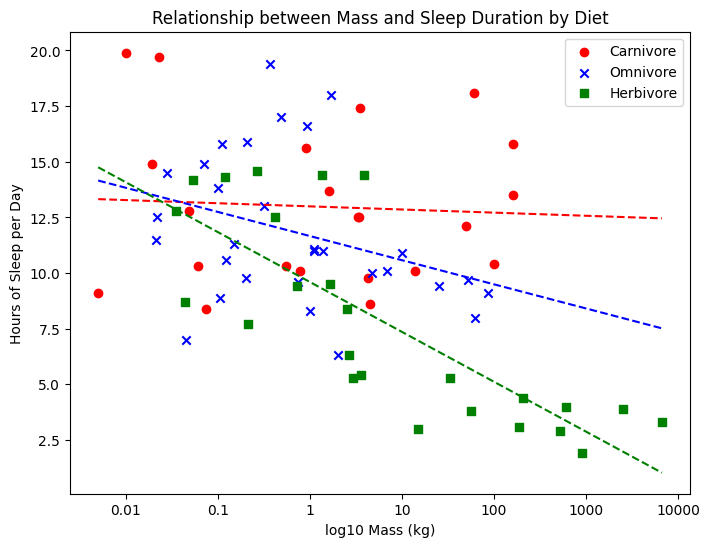

In [15]:
plt.figure(figsize=(8, 6))

# Scatter plot for each diet
plt.scatter(carnivore_df['log10_mass'], carnivore_df['sleep'], color='red', marker='o', label='Carnivore')
plt.scatter(omnivore_df['log10_mass'], omnivore_df['sleep'], color='blue', marker='x', label='Omnivore')
plt.scatter(herbivore_df['log10_mass'], herbivore_df['sleep'], color='green', marker='s', label='Herbivore')

# Generate points for best-fit lines
x_range = pd.DataFrame({'log10_mass': [df['log10_mass'].min(), df['log10_mass'].max()]})
carnivore_pred = carnivore_linear_model.predict(x_range)
omnivore_pred = omnivore_linear_model.predict(x_range)
herbivore_pred = herbivore_linear_model.predict(x_range)

# Plot best-fit lines
plt.plot(x_range['log10_mass'], carnivore_pred, color='red', linestyle='--')
plt.plot(x_range['log10_mass'], omnivore_pred, color='blue', linestyle='--')
plt.plot(x_range['log10_mass'], herbivore_pred, color='green', linestyle='--')

# Add legend and labels
plt.legend()
plt.xlabel('log10 Mass (kg)')
plt.ylabel('Hours of Sleep per Day')
plt.title('Relationship between Mass and Sleep Duration by Diet')

# Set x-axis ticks and labels
xticks = [-2, -1, 0, 1, 2, 3, 4]
xtick_labels = [0.01, 0.1, 1, 10, 100, 1000, 10000]
plt.xticks(xticks, xtick_labels)

plt.show()

## Analyze and interpret models

### Subtask:
Analyze the coefficients and R-squared values of each linear model to understand the relationship between `log10_mass` and `sleep` within each diet category.


**Reasoning**:
Print the model information for each fitted linear model to analyze the coefficients and R-squared values.



In [16]:
print("Carnivore Model Info:")
carnivore_linear_model.print_model_info()

print("\nOmnivore Model Info:")
omnivore_linear_model.print_model_info()

print("\nHerbivore Model Info:")
herbivore_linear_model.print_model_info()

Carnivore Model Info:
LinearModel():
Slope: -0.14090226025203156
Intercept: 12.99704850696372
R-squared: 0.003186503413273978

Omnivore Model Info:
LinearModel():
Slope: -1.0841960083999436
Intercept: 11.662140158348944
R-squared: 0.10944681716489979

Herbivore Model Info:
LinearModel():
Slope: -2.2408355966298785
Intercept: 9.596484459635365
R-squared: 0.6255104280867234


## Propose explanations

### Subtask:
Based on the models and visualizations, propose potential biological or ecological mechanisms that could explain the observed relationships between mass, sleep, and diet.


**Reasoning**:
Propose potential biological or ecological mechanisms that could explain the observed relationships between mass, sleep, and diet based on the model analysis and visualizations.



In [17]:
print("Potential Explanations for Observed Relationships:")
print("\nBased on the analysis, the relationship between log10 mass and sleep varies significantly by diet, with herbivores showing the strongest negative correlation.")
print("\n1. Herbivores:")
print("   - The strong negative correlation (higher R-squared and steeper negative slope) suggests that larger herbivores sleep significantly less.")
print("   - Possible mechanisms:")
print("     - Foraging time: Larger herbivores often require more time to consume sufficient quantities of lower-energy plant matter.")
print("     - Predation risk: Larger size can offer some protection, but herbivores are generally more vulnerable to predation while sleeping compared to carnivores, potentially leading to shorter sleep durations, especially in larger, more exposed species.")
print("     - Digestive process: Herbivores, especially ruminants, have complex and time-consuming digestive processes that might limit sleep time.")
print("     - Metabolism: Larger animals generally have lower metabolic rates per unit of mass, but the need to process large volumes of plant matter could still necessitate more waking time.")

print("\n2. Carnivores:")
print("   - The very weak negative correlation (low R-squared and shallow negative slope) indicates that mass has little influence on sleep duration for carnivores.")
print("   - Possible mechanisms:")
print("     - High-energy diet: Carnivores consume nutrient-dense food, requiring less time for foraging and consumption compared to herbivores.")
print("     - Hunting strategy: Hunting success may depend more on opportunistic encounters or bursts of activity rather than prolonged foraging, allowing for more variable sleep patterns less tied to mass.")
print("     - Safety while sleeping: Carnivores, being at the top of the food chain, generally face lower predation risk while sleeping compared to herbivores, potentially allowing for more consistent sleep durations regardless of size.")

print("\n3. Omnivores:")
print("   - The moderate negative correlation (intermediate R-squared and slope) suggests a relationship between mass and sleep that is stronger than carnivores but weaker than herbivores.")
print("   - Possible mechanisms:")
print("     - Mixed diet: Omnivores benefit from a more varied diet, potentially balancing foraging time and nutrient intake compared to strict herbivores.")
print("     - Adaptability: Their ability to consume both plant and animal matter might lead to more flexible sleep patterns influenced by the availability and ease of obtaining food, with some influence of mass similar to both carnivores and herbivores depending on their specific dietary mix and lifestyle.")
print("     - Predation risk: Predation risk for omnivores can vary widely depending on their size, habitat, and specific diet, leading to a relationship with mass that is intermediate between herbivores and carnivores.")

print("\nOverall, these differences in sleep patterns across diets likely reflect evolutionary adaptations related to energy intake, foraging behavior, metabolic demands, and predation pressure.")

Potential Explanations for Observed Relationships:

Based on the analysis, the relationship between log10 mass and sleep varies significantly by diet, with herbivores showing the strongest negative correlation.

1. Herbivores:
   - The strong negative correlation (higher R-squared and steeper negative slope) suggests that larger herbivores sleep significantly less.
   - Possible mechanisms:
     - Foraging time: Larger herbivores often require more time to consume sufficient quantities of lower-energy plant matter.
     - Predation risk: Larger size can offer some protection, but herbivores are generally more vulnerable to predation while sleeping compared to carnivores, potentially leading to shorter sleep durations, especially in larger, more exposed species.
     - Digestive process: Herbivores, especially ruminants, have complex and time-consuming digestive processes that might limit sleep time.
     - Metabolism: Larger animals generally have lower metabolic rates per unit of mass

## Summary:

### Data Analysis Key Findings

*   The relationship between `log10_mass` and `sleep` varies significantly across different diets.
*   For carnivores, there is a very weak negative correlation between `log10_mass` and sleep (slope \~-0.14, R-squared \~0.003), suggesting mass has little influence on sleep duration.
*   For omnivores, there is a moderate negative correlation (slope \~-1.08, R-squared \~0.11), indicating a stronger relationship than carnivores but weaker than herbivores.
*   For herbivores, there is a strong negative correlation (slope \~-2.24, R-squared \~0.63), suggesting that larger herbivores tend to sleep significantly less.

### Insights or Next Steps

*   The substantial differences in the mass-sleep relationship across diets likely reflect evolutionary adaptations related to foraging behavior, energy intake, predation risk, and digestive physiology.
*   Further investigation could involve incorporating other variables (e.g., brain size, habitat, social behavior) into the models to better understand the complex factors influencing sleep duration across species and diets.
